In [1]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from numba import jit, njit, prange
import time
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Comparison of various algorithms

Est: 3.14131
Sim0 completed in 6.0178 seconds
Est: 3.14238
Sim1 completed in 30.5443 seconds
3.1417788
Sim2 completed in 1.5951 seconds
Est: 3.1412
Sim3 completed in 28.3916 seconds
Est: 3.1412
Sim4 completed in 1.6027 seconds
Plots completed in 2.9084 seconds


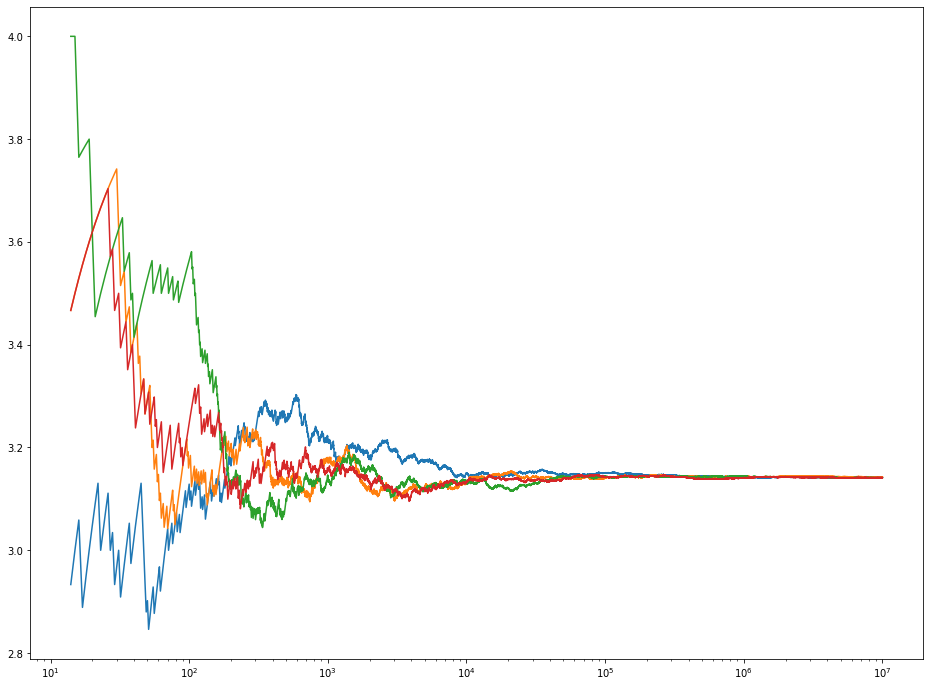

In [33]:
n = int(1e7)
rng = np.arange(n)

'''
sim0 creates a convergence plot using NumPy array operations - the @jit decorator uses a
C-based compiler to speed up Python code and plays well with NumPy.
'''

@jit
def sim0(a):
    return a[0]**2 + a[1]**2 <= 1

tic = time.perf_counter()
a = np.random.rand(n,2)
a = np.fromiter(map(sim0, a), dtype = np.int)
est1 = np.divide(4 * np.cumsum(a), rng + 1)
toc = time.perf_counter()
print('Est: %g'%(est1[-1]))
print(f"Sim0 completed in {toc - tic:0.4f} seconds")

'''
sim1 is a basic Python list-building function to build a convergence plot which has been 
optimized as much as possible, although still much slower than my_fun. 
'''

def sim1(n):
    c = 0
    for i in range(n):
        x = rn.rand(2)
        if x[0]**2 + x[1]**2 <= 1:
            c = c + 1
        est2.append(4 * c / (i + 1))
    return

tic = time.perf_counter()
est2 = []
sim1(n)
toc = time.perf_counter()
print('Est: %g'%(est2[-1]))
print(f"Sim1 completed in {toc - tic:0.4f} seconds")

'''
sim2 uses Numba optimization and is much faster to calculate an estimate at large numbers, but
doesn't produce a convergence plot.
'''

@njit
def sim2(n):
    c = 0
    for i in prange(n):
        x = rn.rand(2)
        if x[0]**2 + x[1]**2 <= 1:
            c = c + 1    
    return 4 * c / n

tic = time.perf_counter()
print(sim2(n))
toc = time.perf_counter()
print(f"Sim2 completed in {toc - tic:0.4f} seconds")

'''
sim3 uses a previously initialized array and a pointer in the loop to build the estimate.
While still slower than sim0, it is 10% faster than sim1
'''

def sim3(n):
    c = 0
    for i in prange(n):
        x = rn.rand(2)
        if x[0]**2 + x[1]**2 <= 1:
            c = c + 1
        est3[i] = (4 * c / (i + 1))
    return

tic = time.perf_counter()
est3 = np.empty([n])
sim3(n)
toc = time.perf_counter()
print('Est: %g'%(est3[-1]))
print(f"Sim3 completed in {toc - tic:0.4f} seconds")

'''
same method as sim3, but now using the @njit to run in C
'''
@njit
def sim4(n, empty_array):
    c = 0
    for i in prange(n):
        x = rn.rand(2)
        if x[0]**2 + x[1]**2 <= 1:
            c = c + 1
        empty_array[i] = (4 * c / (i + 1))
    return empty_array

tic = time.perf_counter()
est4 = np.empty([n])
est4 = sim4(n, est4)
toc = time.perf_counter()
print('Est: %g'%(est3[-1]))
print(f"Sim4 completed in {toc - tic:0.4f} seconds")

'''
timing for the plots
'''

tic = time.perf_counter()
plt.figure(figsize=(16,12))
plt.semilogx(rng[14:], est1[14:])
plt.semilogx(rng[14:], est2[14:])
plt.semilogx(rng[14:], est3[14:])
plt.semilogx(rng[14:], est4[14:])
toc = time.perf_counter()
print(f"Plots completed in {toc - tic:0.4f} seconds")

@njit
def multi(n, listx):
    for i in prange(len(listx)):
        listx[i] = sim2(int(n))
    return listx

Est: 3.14154
Sim0 completed in 0.5417 seconds
3.141772
Sim2 completed in 0.1304 seconds
Est: 3.1412
Sim3 completed in 0.9050 seconds
Plots completed in 0.1736 seconds


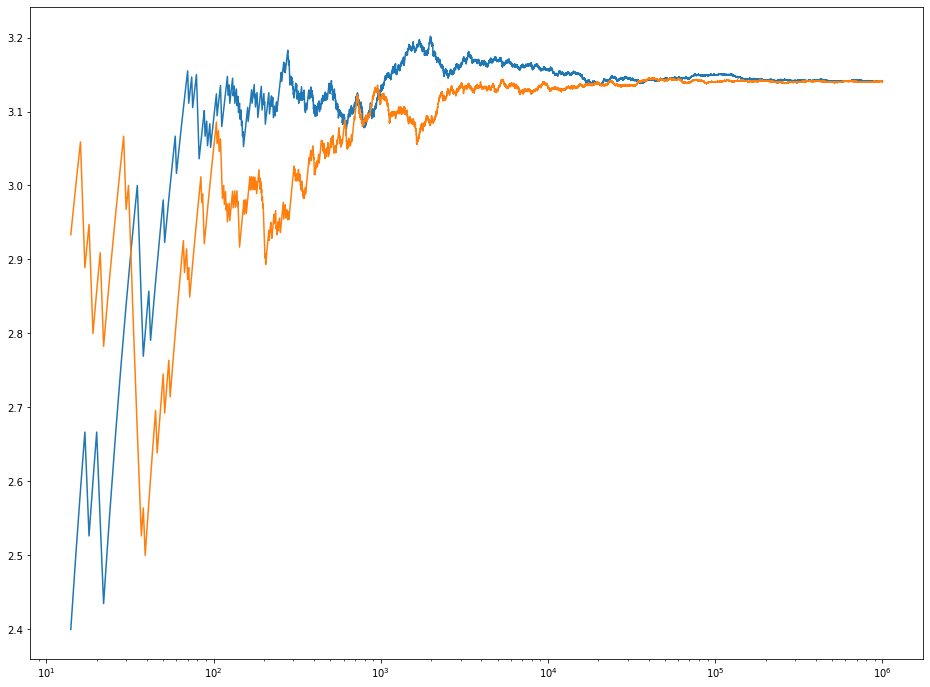

In [35]:
n = int(1e6)
rng = np.arange(n)

tic = time.perf_counter()
a = np.random.rand(n,2)
a = np.fromiter(map(sim0, a), dtype = np.int)
est1 = np.divide(4 * np.cumsum(a), rng + 1)
toc = time.perf_counter()
print('Est: %g'%(est1[-1]))
print(f"Sim0 completed in {toc - tic:0.4f} seconds")

tic = time.perf_counter()
print(sim2(n))
toc = time.perf_counter()
print(f"Sim2 completed in {toc - tic:0.4f} seconds")

tic = time.perf_counter()
est4 = np.empty([n])
est4 = sim4(n, est4)
toc = time.perf_counter()
print('Est: %g'%(est3[-1]))
print(f"Sim3 completed in {toc - tic:0.4f} seconds")

tic = time.perf_counter()
plt.figure(figsize=(16,12))
plt.semilogx(rng[14:], est1[14:])
plt.semilogx(rng[14:], est4[14:])
toc = time.perf_counter()
print(f"Plots completed in {toc - tic:0.4f} seconds")

# Problem initial analysis

Pi estimate with 50000 guesses: 3.15184 Error: 0.00447213595499958


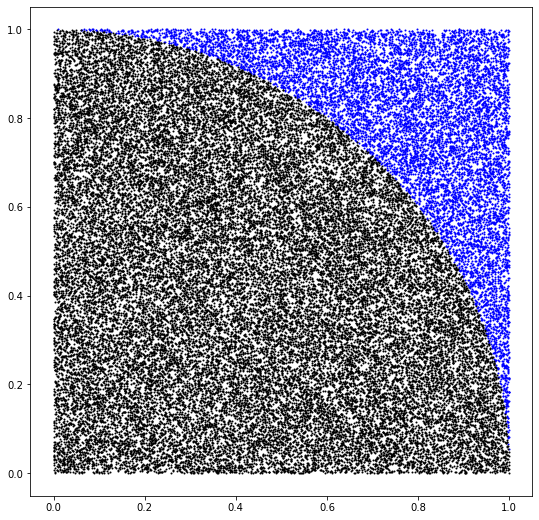

In [29]:
n = 50000
s = 1
a = 1

rn.seed(42)

@jit
def test(pair):
    x, y = pair
    return x**2 + y**2 <= 1

x = rn.uniform(0, a, n)
y = rn.uniform(0, a, n)
tot = zip(x, y)
tru = list(map(test, tot))
xt = x[tru]
yt = y[tru]
xf = x[np.invert(tru)]
yf = y[np.invert(tru)]

ratio = len(xt) / n
area = a ** 2 * ratio
full_area = 4 * area
pi_est = full_area / (a ** 2)
err_est = 1 / np.sqrt(n)
print('Pi estimate with', n, 'guesses:', pi_est, 'Error:', err_est)

fig = plt.figure(figsize = [9, 9])
plt.scatter(xf, yf, s = s, c = 'blue')
plt.scatter(xt, yt, s = s, c = 'black')
plt.show()

Mean:  3.1416995200000004 Std. Dev.:  0.0016995124270213476


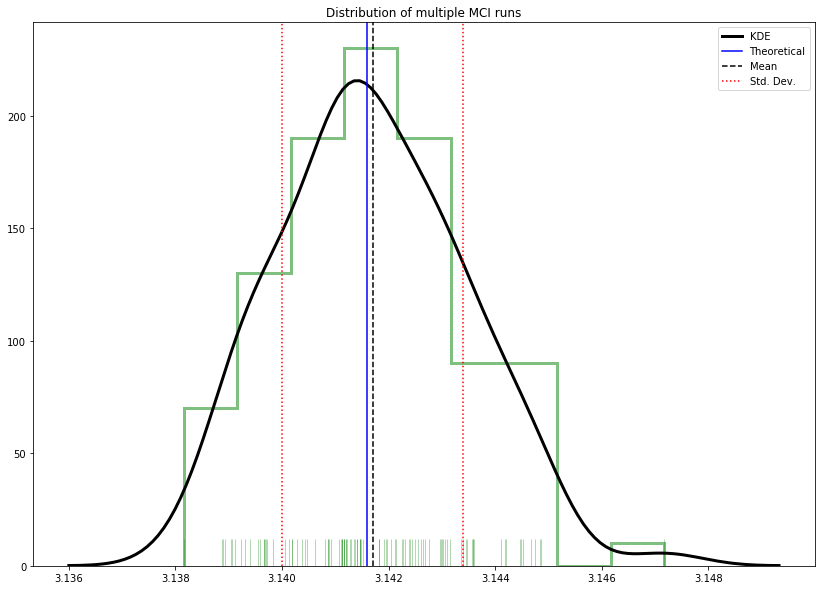

In [10]:
k = 100
n = 1e6
listx = np.zeros(k)
for i in range(len(listx)):
    listx[i] = sim2(int(n))
fig = plt.figure(figsize=(14, 10))
ax = sns.distplot(listx, rug=True, rug_kws={"color": "g", "alpha": .3},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": .5, "color": "g"})
ax.axvline(np.pi, c = 'b', label = 'Theoretical')
ax.axvline(np.mean(listx), c = 'k', ls = '--', label = 'Mean')
ax.axvline(np.mean(listx) - np.std(listx), c = 'r', ls = ':')
ax.axvline(np.mean(listx) + np.std(listx), c = 'r', ls = ':', label = 'Std. Dev.')
ax.set_title('Distribution of multiple MCI runs')
ax.legend()
print('Mean: ',np.mean(listx),'Std. Dev.: ',np.std(listx))

# $\pi$ to 3 digits - full analysis

In [31]:
n = int(78e5)
rng = np.arange(n)

rn.seed(1234)

tic = time.perf_counter()
est = np.empty([n])
est = sim4(n, est)
toc = time.perf_counter()
print(f"Completed in {toc - tic:0.4f} seconds")

pi_est = est[-1]
err_est = 1 / np.sqrt(n)
abs_err = abs(pi_est - np.pi) / np.pi
sam_sd = np.std(est[-10000:])
sam_mean = np.mean(est[-10000:])
print('Pi estimate with', n, 'guesses:', pi_est, '\nError order:', err_est)

Completed in 1.1653 seconds
Pi estimate with 7800000 guesses: 3.141954871794872 
Error order: 0.0003580574370197164


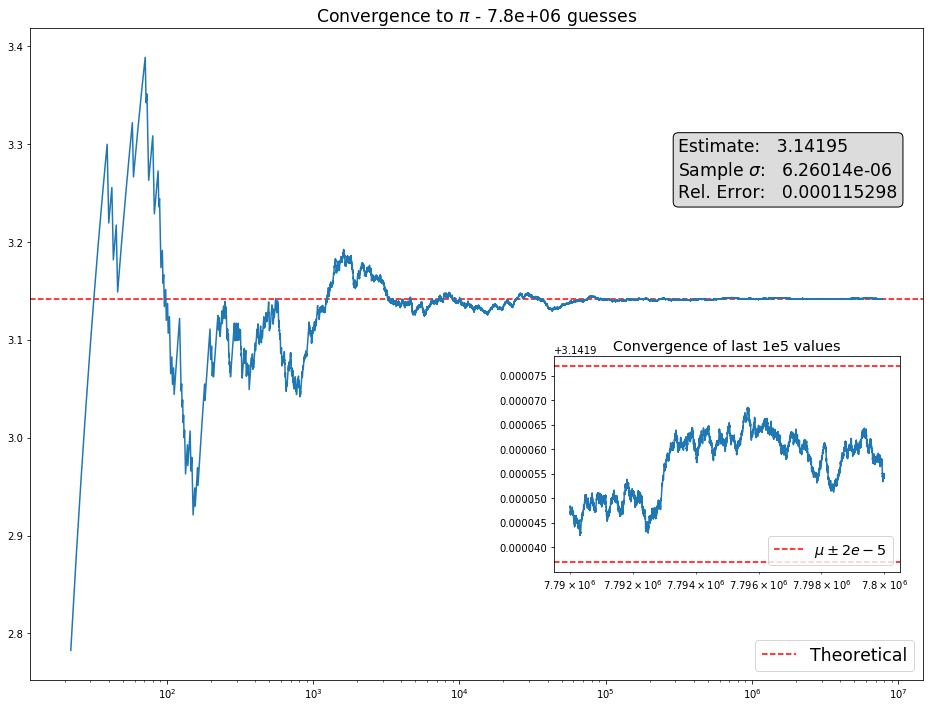

In [45]:
fig, ax1 = plt.subplots(figsize = [16,12])
ax2 = fig.add_axes([.58, .25, .3, .25])
ax1.axhline(np.pi, ls = '--', c = 'red', 
            label = 'Theoretical')
ax1.semilogx(rng[22:], est[22:])
ax1.set_title('Convergence to $\pi$ - %g guesses'%(n), 
              fontsize = 'xx-large')
ax1.legend(loc = 'lower right', fontsize = 'xx-large')
ax1.annotate('Estimate:   %.6g\nSample $\sigma$:   %.6g\nRel. Error:   %.6g'%(pi_est, sam_sd, abs_err),
            xy = (.72, .72), xycoords = 'figure fraction', fontsize = 'xx-large',
            bbox=dict(boxstyle="round", fc="gainsboro"))
ax2.semilogx(rng[-10000:], est[-10000:])
ax2.set_title('Convergence of last 1e5 values', fontsize = 'x-large')
ax2.axhline(sam_mean - 2e-5, color = 'red', linestyle = '--',
           label = '$\mu \pm 2e-5$')
ax2.axhline(sam_mean + 2e-5, color = 'red', linestyle = '--')
ax2.legend(fontsize = 'x-large', loc = 4)
plt.show()

In [41]:
k = 1000
n = 1e6
listx = np.zeros(k)
tic = time.perf_counter()
listx = multi(n, listx)
toc = time.perf_counter()
print(f"Completed in {toc - tic:0.4f} seconds")
print('%g runs of %g numbers'%(k, n))


Completed in 133.8376 seconds
1000 runs of 1e+06 numbers


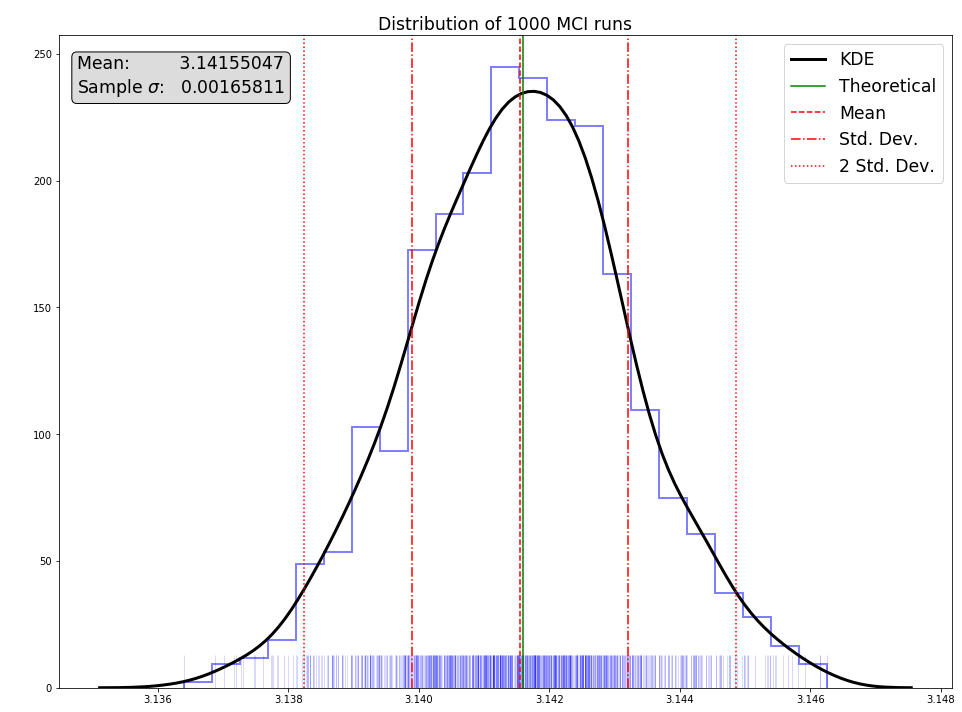

In [42]:
fig = plt.figure(figsize=(16, 12))
ax = sns.distplot(listx, rug=True, rug_kws={"color": "b", "alpha": .15},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": .5, "color": "b"})
ax.axvline(np.pi, c = 'g', label = 'Theoretical')
ax.axvline(np.mean(listx), c = 'r', ls = '--', label = 'Mean')
ax.axvline(np.mean(listx) - np.std(listx), c = 'r', ls = '-.')
ax.axvline(np.mean(listx) + np.std(listx), c = 'r', ls = '-.', label = 'Std. Dev.')
ax.axvline(np.mean(listx) - 2 * np.std(listx), c = 'r', ls = ':')
ax.axvline(np.mean(listx) + 2 * np.std(listx), c = 'r', ls = ':', label = '2 Std. Dev.')
ax.set_title('Distribution of %g MCI runs'%(k), fontsize = 'xx-large')
ax.annotate('Mean:         %.9g\nSample $\sigma$:   %.6g'%(np.mean(listx), np.std(listx)),
            xy = (.08, .87), xycoords = 'figure fraction', fontsize = 'xx-large',
            bbox=dict(boxstyle="round", fc="gainsboro"))
ax.legend(fontsize = 'xx-large')

# $\pi$ to 5 digits - full analysis

In [3]:
n = int(2e9)
rng = np.arange(n)

rn.seed(1234)

tic = time.perf_counter()
est = np.empty([n])
est = sim4(n, est)
toc = time.perf_counter()
print(f"Completed in {toc - tic:0.4f} seconds")

pi_est = est[-1]
err_est = 1 / np.sqrt(n)
abs_err = abs(pi_est - np.pi) / np.pi
sam_sd = np.std(est[-20000000:])
sam_mean = np.mean(est[-20000000:])
print('Pi estimate with', n, 'guesses:', pi_est, '\nError order:', err_est)

Completed in 328.7245 seconds
Pi estimate with 2000000000 guesses: 3.141577504 
Error order: 2.2360679774997898e-05


In [4]:
'''
This reduces the data for plotting, CAREFUL: this only works for 2b points!
'''
n = 4
a = np.arange(1 * 10**n)
scale = np.arange(1,10,.0005)
for i in range (9-n):
    a = np.concatenate((a, scale * 10**(i + n)))
### This line added for 10's b, the loop above works for single exponentials ###
a = np.concatenate((a, [i * 10**9 for i in np.arange(1,2,.001)]))            ###
################################################################################
a = a.astype(int)
est = est[a]
rng = rng[a]
print(f'Length of reduced array: {len(a)}')

Length of reduced array: 101000


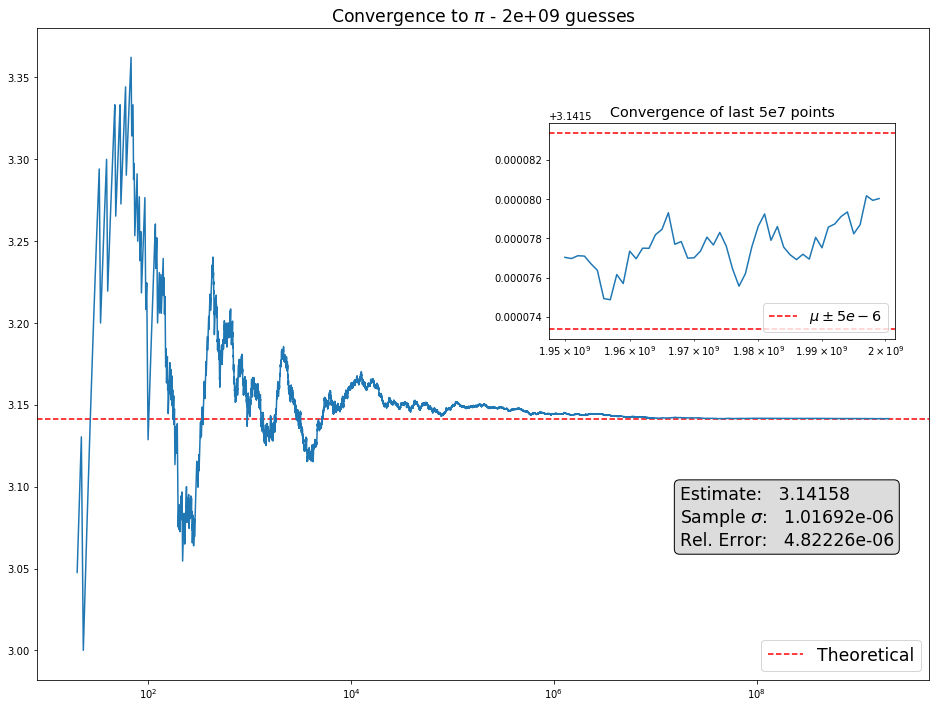

In [10]:
m = 2e9
fig, ax1 = plt.subplots(figsize = [16,12])
ax2 = fig.add_axes([.57, .52, .3, .25])
ax1.axhline(np.pi, ls = '--', c = 'red', 
            label = 'Theoretical')
ax1.semilogx(rng[20:], est[20:])
ax1.set_title('Convergence to $\pi$ - %g guesses'%(m), 
              fontsize = 'xx-large')
ax1.legend(loc = 'lower right', fontsize = 'xx-large')
ax1.annotate('Estimate:   %.6g\nSample $\sigma$:   %.6g\nRel. Error:   %.6g'%(pi_est, sam_sd, abs_err),
            xy = (.72, .23), xycoords = 'figure fraction', fontsize = 'xx-large',
            bbox=dict(boxstyle="round", fc="gainsboro"))
ax2.semilogx(rng[-50:], est[-50:])
ax2.set_title('Convergence of last 5e7 points', fontsize = 'x-large')
ax2.axhline(sam_mean - 5e-6, color = 'red', linestyle = '--',
           label = '$\mu \pm 5e-6$')
ax2.axhline(sam_mean + 5e-6, color = 'red', linestyle = '--')
ax2.legend(fontsize = 'x-large', loc = 4)
plt.show()

In [51]:
k = 100
n = 1e8
listx = np.zeros(k)
tic = time.perf_counter()
listx = multi(n, listx)
toc = time.perf_counter()
print(f"Completed in {toc - tic:0.4f} seconds")
print('%g runs of %g numbers'%(k, n))


Completed in 1339.1059 seconds
100 runs of 1e+08 numbers


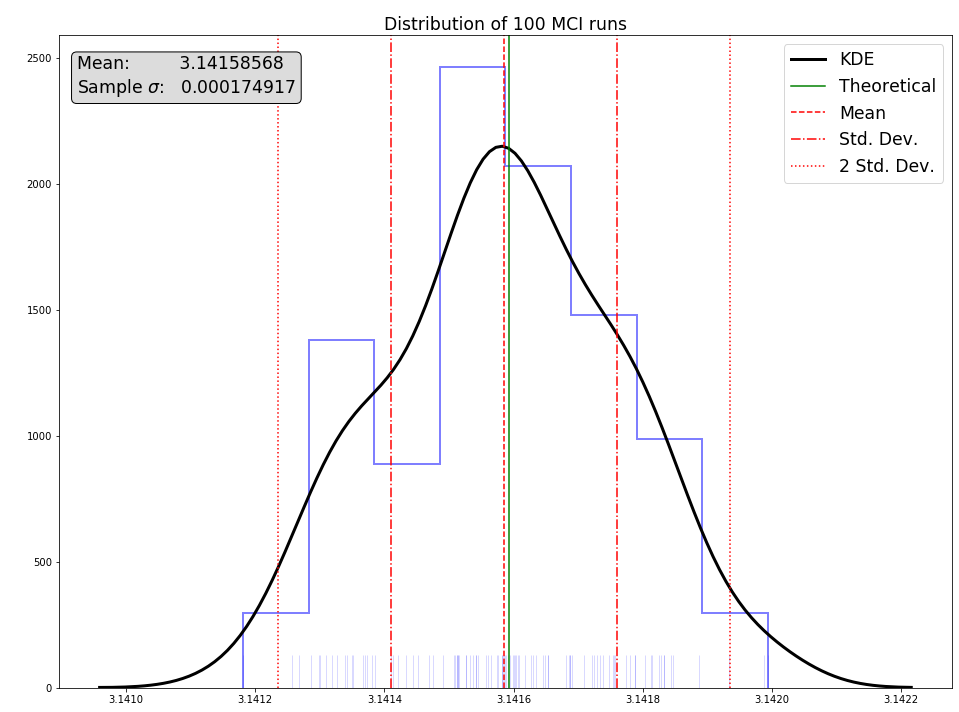

In [52]:
fig = plt.figure(figsize=(16, 12))
ax = sns.distplot(listx, rug=True, rug_kws={"color": "b", "alpha": .15},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": .5, "color": "b"})
ax.axvline(np.pi, c = 'g', label = 'Theoretical')
ax.axvline(np.mean(listx), c = 'r', ls = '--', label = 'Mean')
ax.axvline(np.mean(listx) - np.std(listx), c = 'r', ls = '-.')
ax.axvline(np.mean(listx) + np.std(listx), c = 'r', ls = '-.', label = 'Std. Dev.')
ax.axvline(np.mean(listx) - 2 * np.std(listx), c = 'r', ls = ':')
ax.axvline(np.mean(listx) + 2 * np.std(listx), c = 'r', ls = ':', label = '2 Std. Dev.')
ax.set_title('Distribution of %g MCI runs'%(k), fontsize = 'xx-large')
ax.annotate('Mean:         %.9g\nSample $\sigma$:   %.6g'%(np.mean(listx), np.std(listx)),
            xy = (.08, .87), xycoords = 'figure fraction', fontsize = 'xx-large',
            bbox=dict(boxstyle="round", fc="gainsboro"))
ax.legend(fontsize = 'xx-large')

# __Problem 2__
#### *Estimating mass of an ellipsoid: constant density function*

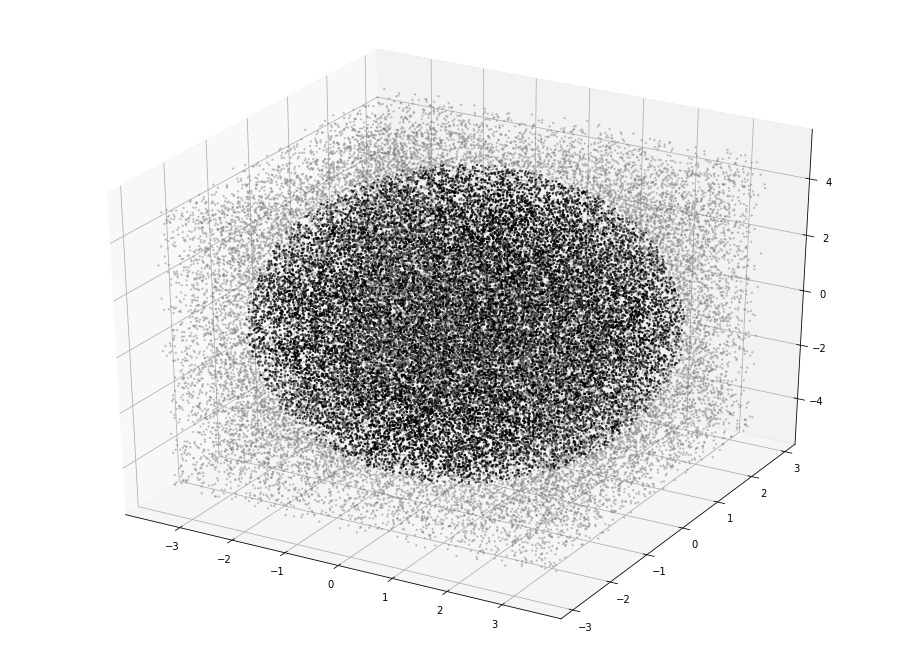

In [63]:
n = 50000
s = 2
a = (25 / 2)**(.5)
b = (25 / 3)**(.5)
c = 5

rn.seed(42)

def test(x):
    x, y, z = x
    return 2*x**2 + 3*y**2 + z**2 <= 25

x = rn.uniform(-a, a, n)
y = rn.uniform(-b, b, n)
z = rn.uniform(-c, c, n)
tot = zip(x, y, z)
tru = list(map(test, tot))
xt = x[tru]
yt = y[tru]
zt = z[tru]
xf = x[np.invert(tru)]
yf = y[np.invert(tru)]
zf = z[np.invert(tru)]

fig = plt.figure(figsize = [16, 12])
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xf, yf, zf, s = s, c = 'grey', alpha = .35)
ax.scatter(xt, yt, zt, s = s, c = 'black')
plt.show()

In [11]:
n = int(78e5)
rng = np.arange(n)
theoretical = 213.758
a = (25 / 2)**(.5)
b = (25 / 3)**(.5)
c = 5

rn.seed(1234)

@njit
def sim_ellipse(n, empty_array):
    m = 0
    for i in prange(n):
        w = rn.rand(3)
        x = w[0] * (2 * a) - a
        y = w[1] * (2 * b) - b
        z = w[2] * (2 * c) - c
        if 2*x**2 + 3*y**2 + z**2 <= 25:
            m = m + 1
        empty_array[i] = (8 * a * b * c * m / (i + 1))
    return empty_array

tic = time.perf_counter()
est = np.empty([n])
est = sim_ellipse(n, est)
toc = time.perf_counter()
print(f"Completed in {toc - tic:0.4f} seconds")

vol_est = est[-1]
err_est = 1 / np.sqrt(n)
abs_err = abs(vol_est - theoretical) / theoretical
sam_sd = np.std(est[-10000:])
sam_mean = np.mean(est[-10000:])
print(f'Mass estimate with {n} guesses: {vol_est}', f'\nError order: {err_est}')

Completed in 1.4789 seconds
Mass estimate with 7800000 guesses: 213.63774356689885 
Error order: 0.0003580574370197164


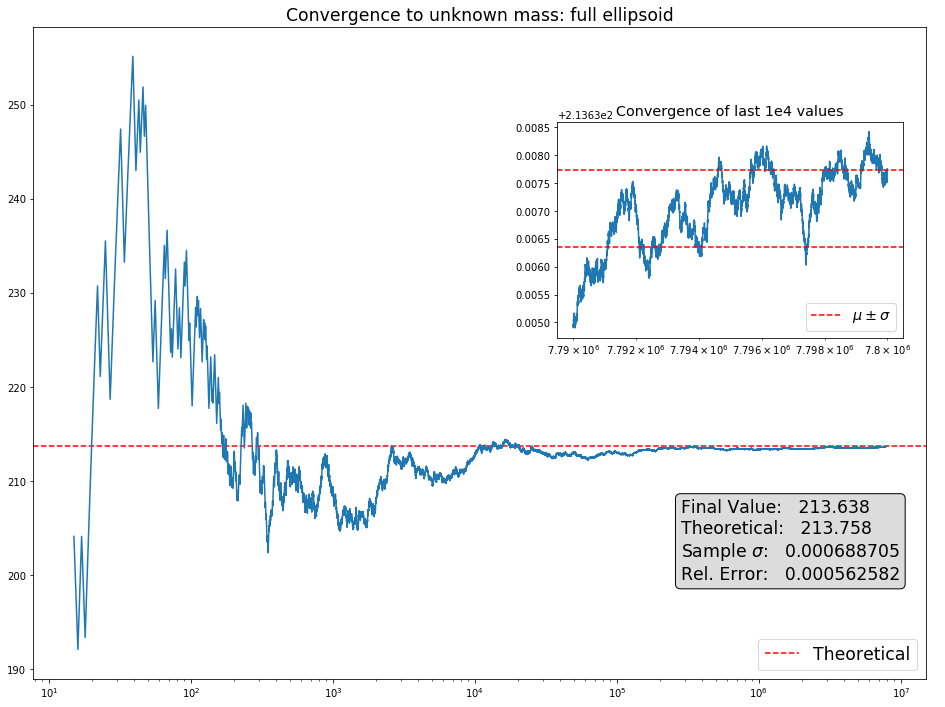

In [16]:
fig, ax1 = plt.subplots(figsize = [16,12])
ax2 = fig.add_axes([.58, .52, .3, .25])
ax1.axhline(213.758, linestyle = '--', color = 'red', 
            label = 'Theoretical')
ax1.semilogx(rng[15:], est[15:])
ax1.set_title('Convergence to unknown mass: full ellipsoid', 
              fontsize = 'xx-large')
ax1.legend(loc = 'lower right', fontsize = 'xx-large')
ax1.annotate('Final Value:   %.6g\nTheoretical:   %.6g\nSample $\sigma$:   %.6g\nRel. Error:   %.6g'%(vol_est, 213.758, sam_sd, abs_err),
            xy = (.72, .18), xycoords = 'figure fraction', fontsize = 'xx-large',
            bbox=dict(boxstyle="round", fc="gainsboro"))
ax2.semilogx(rng[-10000:], est[-10000:])
ax2.set_title('Convergence of last 1e4 values', fontsize = 'x-large')
ax2.axhline(sam_mean - sam_sd, color = 'red', linestyle = '--',
           label = '$\mu \pm \sigma$')
ax2.axhline(sam_mean + sam_sd, color = 'red', linestyle = '--')
ax2.legend(fontsize = 'x-large', loc = 4)
plt.show()

In [3]:
@njit
def sim2_ellipse(n):
    m = 0
    for i in prange(n):
        w = rn.rand(3)
        x = w[0] * (2 * a) - a
        y = w[1] * (2 * b) - b
        z = w[2] * (2 * c) - c
        if 2*x**2 + 3*y**2 + z**2 <= 25:
            m = m + 1
    return 8 * a * b * c * m / (i + 1)

@njit
def multi_ellipse(n, listx):
    for i in prange(len(listx)):
        listx[i] = sim2_ellipse(int(n))
    return listx

In [125]:
k = 1000
n = 1e6
listx = np.zeros(k)
tic = time.perf_counter()
listx = multi_ellipse(n, listx)
toc = time.perf_counter()
print(f"Completed in {toc - tic:0.4f} seconds")
print('%g runs of %g numbers'%(k, n))

Completed in 142.0718 seconds
1000 runs of 1e+06 numbers


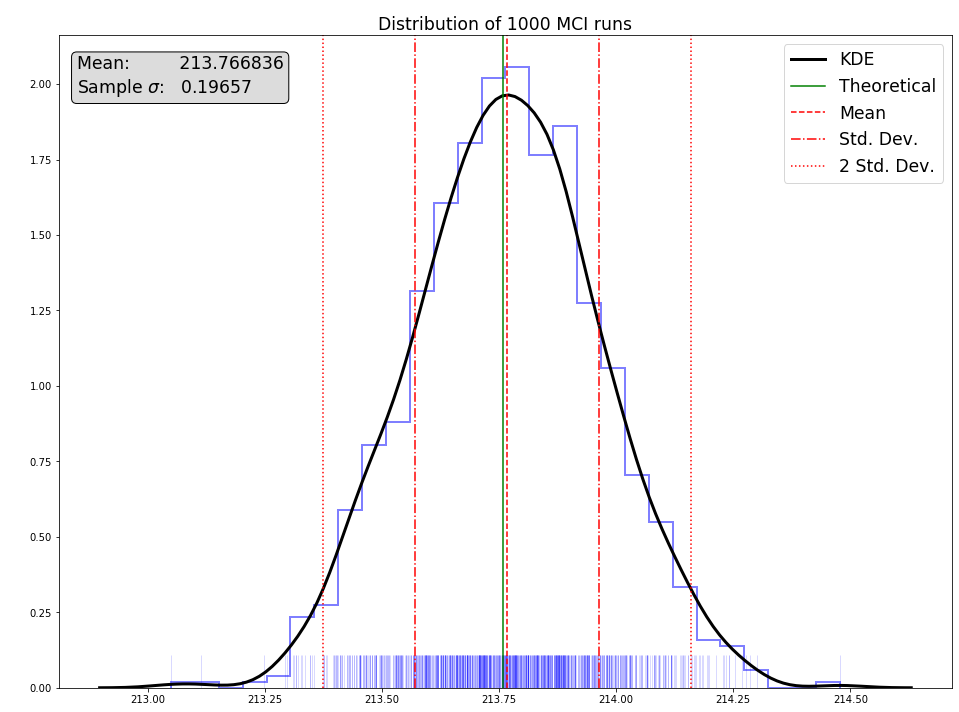

In [127]:
fig = plt.figure(figsize=(16, 12))
ax = sns.distplot(listx, rug=True, rug_kws={"color": "b", "alpha": .15},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": .5, "color": "b"})
ax.axvline(theoretical, c = 'g', label = 'Theoretical')
ax.axvline(np.mean(listx), c = 'r', ls = '--', label = 'Mean')
ax.axvline(np.mean(listx) - np.std(listx), c = 'r', ls = '-.')
ax.axvline(np.mean(listx) + np.std(listx), c = 'r', ls = '-.', label = 'Std. Dev.')
ax.axvline(np.mean(listx) - 2 * np.std(listx), c = 'r', ls = ':')
ax.axvline(np.mean(listx) + 2 * np.std(listx), c = 'r', ls = ':', label = '2 Std. Dev.')
ax.set_title('Distribution of %g MCI runs'%(k), fontsize = 'xx-large')
ax.annotate('Mean:         %.9g\nSample $\sigma$:   %.6g'%(np.mean(listx), np.std(listx)),
            xy = (.08, .87), xycoords = 'figure fraction', fontsize = 'xx-large',
            bbox=dict(boxstyle="round", fc="gainsboro"))
ax.legend(fontsize = 'xx-large')

# __Problem 3__
#### *Estimating mass of a truncated ellipsoid: constant density function*

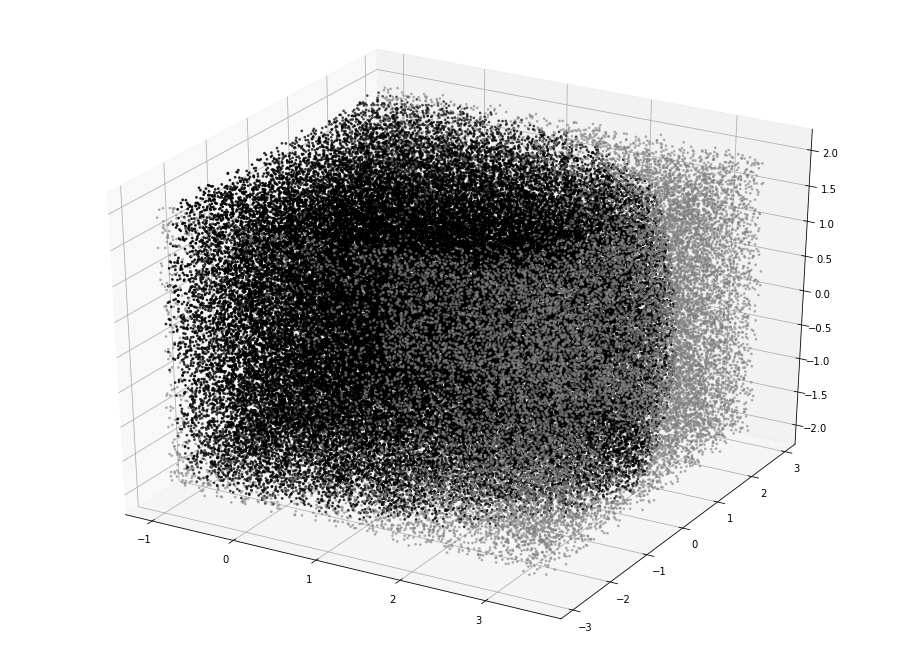

In [135]:
n = 100000
s = 3
a = (25 / 2)**(.5)
b = (25 / 3)**(.5)
c = 5

rn.seed(42)

def test(x):
    x,y,z = x
    return 2*x**2 + 3*y**2 + z**2 <= 25

x = rn.uniform(-1, a, n)
y = rn.uniform(-b, b, n)
z = rn.uniform(-2, 2, n)
tot = zip(x, y, z)
tru = list(map(test, tot))
xt = x[tru]
yt = y[tru]
zt = z[tru]
xf = x[np.invert(tru)]
yf = y[np.invert(tru)]
zf = z[np.invert(tru)]

fig = plt.figure(figsize = [16, 12])
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xf, yf, zf, s = s, c = 'grey', alpha = .5)
ax.scatter(xt, yt, zt, s = s, c = 'black')
plt.show()

In [17]:
n = int(78e5)
rng = np.arange(n)
theoretical = 82.8489
a = (25 / 2)**(.5)
b = (25 / 3)**(.5)
c = 5

rn.seed(1234)

@njit
def sim_tellipse(n, empty_array):
    m = 0
    for i in prange(n):
        w = rn.rand(3)
        x = w[0] * (a + 1) - 1
        y = w[1] * (2 * b) - b
        z = w[2] * (4) - 2
        if 2*x**2 + 3*y**2 + z**2 <= 25:
            m = m + 1
        empty_array[i] = (2 * (a + 1) * b * 4 * m / (i + 1))
    return empty_array

tic = time.perf_counter()
est = np.empty([n])
est = sim_tellipse(n, est)
toc = time.perf_counter()
print(f"Completed in {toc - tic:0.4f} seconds")

vol_est = est[-1]
err_est = 1 / np.sqrt(n)
abs_err = abs(vol_est - theoretical) / theoretical
sam_sd = np.std(est[-10000:])
sam_mean = np.mean(est[-10000:])
print(f'Mass estimate with {n} guesses: {vol_est}', f'\nError order: {err_est}')

Completed in 1.6518 seconds
Mass estimate with 7800000 guesses: 82.896852128537 
Error order: 0.0003580574370197164


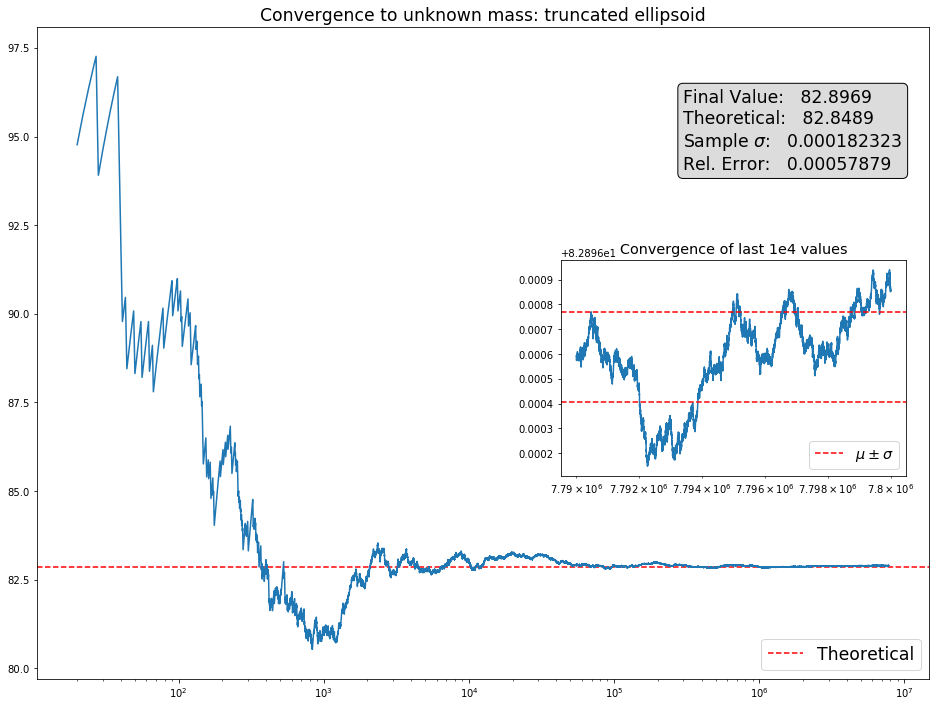

In [22]:
fig, ax1 = plt.subplots(figsize = [16,12])
ax2 = fig.add_axes([.58, .36, .3, .25])
ax1.axhline(theoretical, linestyle = '--', color = 'red', 
            label = 'Theoretical')
ax1.semilogx(rng[20:], est[20:])
ax1.set_title('Convergence to unknown mass: truncated ellipsoid', 
              fontsize = 'xx-large')
ax1.legend(loc = 'lower right', fontsize = 'xx-large')
ax1.annotate('Final Value:   %.6g\nTheoretical:   %.6g\nSample $\sigma$:   %.6g\nRel. Error:   %.6g'%(vol_est, theoretical, sam_sd, abs_err),
            xy = (.72, .76), xycoords = 'figure fraction', fontsize = 'xx-large',
            bbox=dict(boxstyle="round", fc="gainsboro"))
ax2.semilogx(rng[-10000:], est[-10000:])
ax2.set_title('Convergence of last 1e4 values', fontsize = 'x-large')
ax2.axhline(sam_mean - sam_sd, color = 'red', linestyle = '--',
           label = '$\mu \pm \sigma$')
ax2.axhline(sam_mean + sam_sd, color = 'red', linestyle = '--')
ax2.legend(fontsize = 'x-large', loc = 'lower right')
plt.show()

In [4]:
@njit
def sim2_tellipse(n):
    m = 0
    for i in prange(n):
        w = rn.rand(3)
        x = w[0] * (a + 1) - 1
        y = w[1] * (2 * b) - b
        z = w[2] * (4) - 2
        if 2*x**2 + 3*y**2 + z**2 <= 25:
            m = m + 1
    return 2 * (a + 1) * b * 4 * m / (i + 1)

@njit
def multi_tellipse(n, listx):
    for i in prange(len(listx)):
        listx[i] = sim2_tellipse(int(n))
    return listx

In [144]:
k = 1000
n = 1e6
listx = np.zeros(k)
tic = time.perf_counter()
listx = multi_tellipse(n, listx)
toc = time.perf_counter()
print(f"Completed in {toc - tic:0.4f} seconds")
print('%g runs of %g numbers'%(k, n))

Completed in 143.5146 seconds
1000 runs of 1e+06 numbers


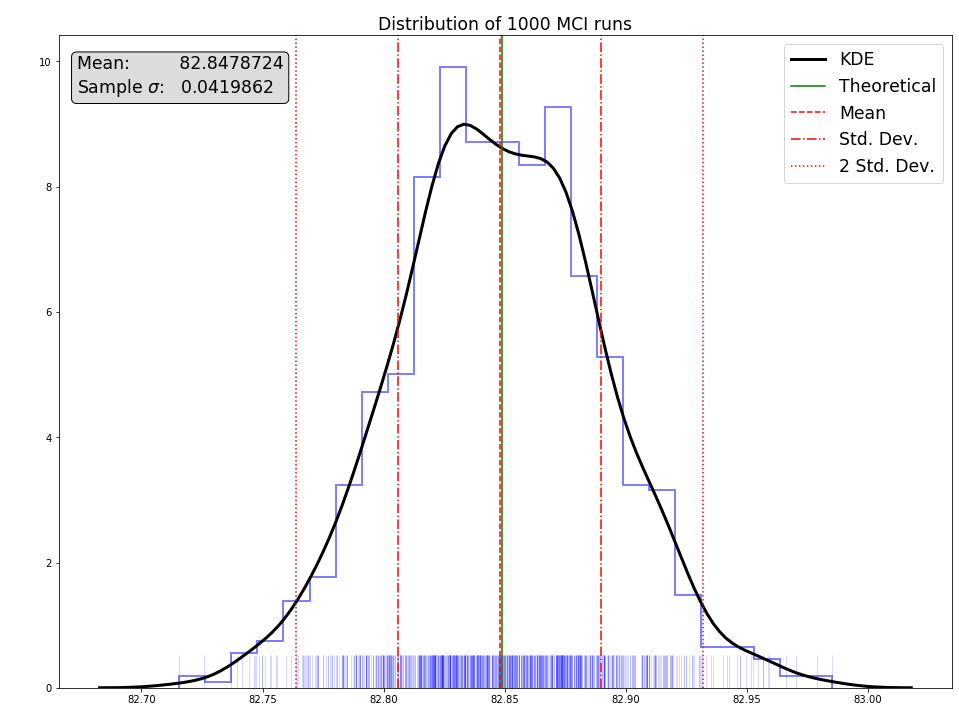

In [145]:
fig = plt.figure(figsize=(16, 12))
ax = sns.distplot(listx, rug=True, rug_kws={"color": "b", "alpha": .15},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": .5, "color": "b"})
ax.axvline(theoretical, c = 'g', label = 'Theoretical')
ax.axvline(np.mean(listx), c = 'r', ls = '--', label = 'Mean')
ax.axvline(np.mean(listx) - np.std(listx), c = 'r', ls = '-.')
ax.axvline(np.mean(listx) + np.std(listx), c = 'r', ls = '-.', label = 'Std. Dev.')
ax.axvline(np.mean(listx) - 2 * np.std(listx), c = 'r', ls = ':')
ax.axvline(np.mean(listx) + 2 * np.std(listx), c = 'r', ls = ':', label = '2 Std. Dev.')
ax.set_title('Distribution of %g MCI runs'%(k), fontsize = 'xx-large')
ax.annotate('Mean:         %.9g\nSample $\sigma$:   %.6g'%(np.mean(listx), np.std(listx)),
            xy = (.08, .87), xycoords = 'figure fraction', fontsize = 'xx-large',
            bbox=dict(boxstyle="round", fc="gainsboro"))
ax.legend(fontsize = 'xx-large')

# __Problem 4__
#### *Estimating mass of a truncated ellipsoid: non-linear density function*

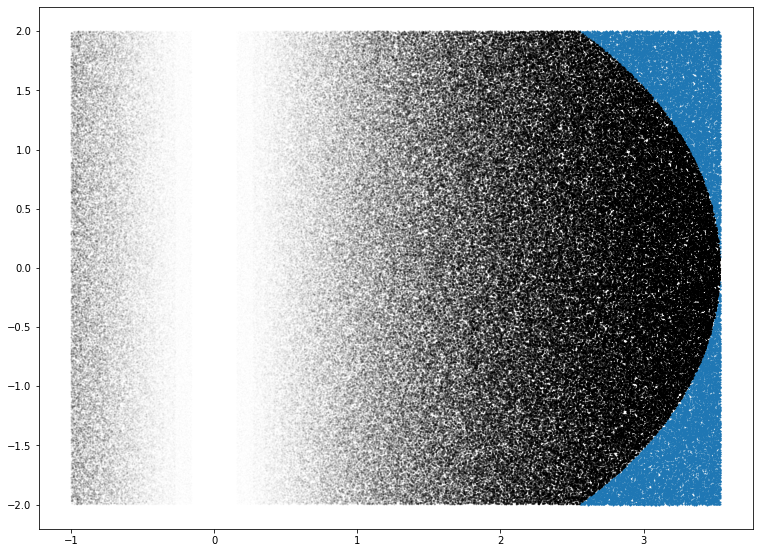

In [25]:
n = 300000
s = 1
a = (25 / 2)**(.5)
b = (25 / 3)**(.5)

rn.seed(42)

def test(x):
    x,y = x
    return 2*x**2 + 3*y**2 <= 25

x = rn.uniform(-1,a,n)
y = rn.uniform(-2,2,n)
tot = zip(x,y)
tru = list(map(test,tot))
xt = x[tru]
yt = y[tru]
xf = x[np.invert(tru)]
yf = y[np.invert(tru)]
d = xt ** 2
alp = d/(a**2)

grad_col = np.zeros((len(d),4))
grad_col[:, 3] = alp 

fig = plt.figure(figsize = [12.8,9.6])
plt.scatter(xf,yf, s = s)
plt.scatter(xt,yt, s = s, c = grad_col)
plt.show()

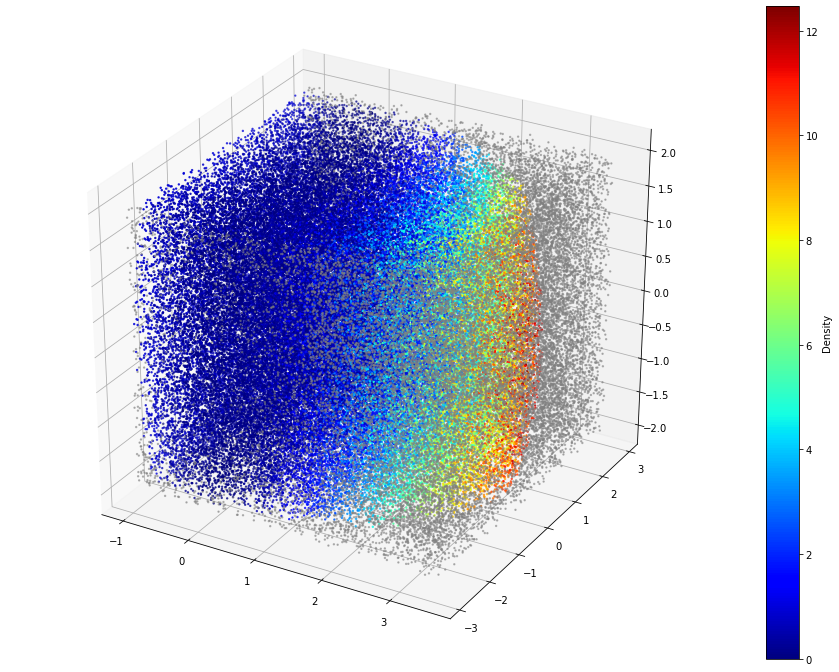

In [146]:
n = 100000
s = 2
a = (25 / 2)**(.5)
b = (25 / 3)**(.5)
c = 5

rn.seed(42)

def test(x):
    x,y,z = x
    return 2*x**2 + 3*y**2 + z**2 <= 25

x = rn.uniform(-1, a, n)
y = rn.uniform(-b, b, n)
z = rn.uniform(-2, 2, n)
tot = zip(x, y, z)
tru = list(map(test, tot))
xt = x[tru]
yt = y[tru]
zt = z[tru]
xf = x[np.invert(tru)]
yf = y[np.invert(tru)]
zf = z[np.invert(tru)]

d = xt ** 2

grad_col = np.zeros((len(d),4))
grad_col[:, 3] = d 

fig = plt.figure(figsize = [16, 12])
ax = fig.add_subplot(111, projection = '3d')
plt.set_cmap('jet')
ax.scatter(xf, yf, zf, s = s, c = 'grey', alpha = .5)
p = ax.scatter(xt, yt, zt, s = s, c = d)
plt.colorbar(p, label = 'Density')
plt.show()

In [23]:
n = int(78e5)
theoretical = 187.343
rng = np.arange(n)
m = 0

rn.seed(42)

@njit
def sim_tvellipse(n, empty_array):
    m = 0
    d = 0
    for i in prange(n):
        w = rn.rand(3)
        x = w[0] * (a + 1) - 1
        y = w[1] * (2 * b) - b
        z = w[2] * (4) - 2
        if 2*x**2 + 3*y**2 + z**2 <= 25:
            m = m + 1
            d = d + x**2
        empty_array[i] = (d / m) * (2 * (a + 1) * b * 4 * m / (i + 1))
    return empty_array
    
tic = time.perf_counter()
est = np.empty([n])
est = sim_tvellipse(n, est)
toc = time.perf_counter()
print(f"Completed in {toc - tic:0.4f} seconds")

vol_est = est[-1]
err_est = 1 / np.sqrt(n)
abs_err = abs(vol_est - theoretical) / theoretical
sam_sd = np.std(est[-10000:])
sam_mean = np.mean(est[-10000:])
print(f'Mass estimate with {n} guesses: {vol_est}', f'\nError order: {err_est}')

Completed in 1.6226 seconds
Mass estimate with 7800000 guesses: 187.2220963704849 
Error order: 0.0003580574370197164


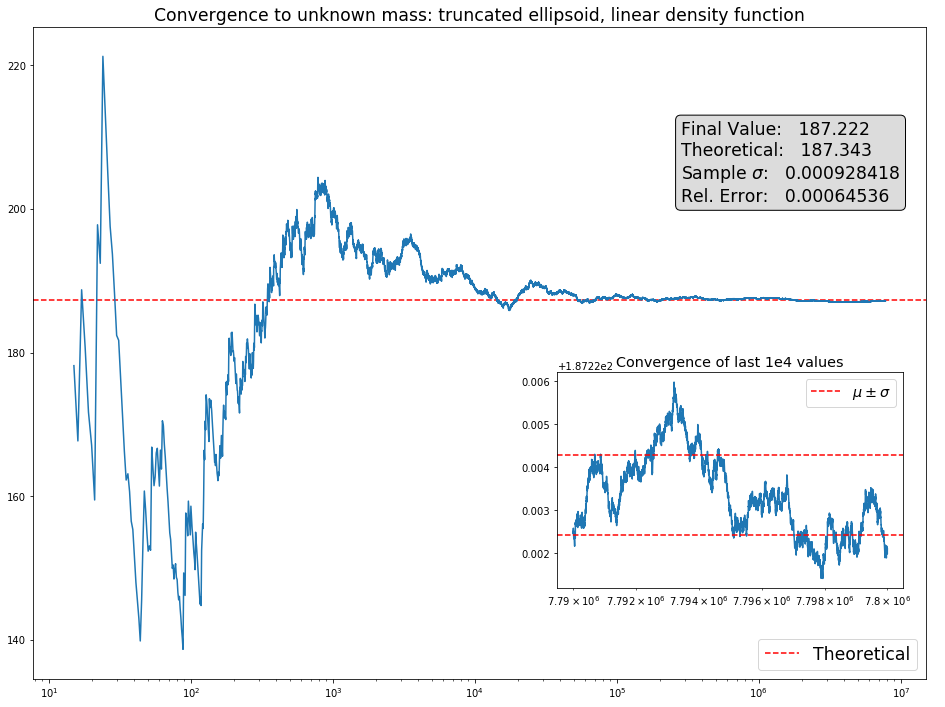

In [28]:
fig, ax1 = plt.subplots(figsize = [16,12])
ax2 = fig.add_axes([.58, .23, .3, .25])
ax1.axhline(theoretical, linestyle = '--', color = 'red', 
            label = 'Theoretical')
ax1.semilogx(rng[15:], est[15:])
ax1.set_title('Convergence to unknown mass: truncated ellipsoid, linear density function', 
              fontsize = 'xx-large')
ax1.legend(loc = 'lower right', fontsize = 'xx-large')
ax1.annotate('Final Value:   %.6g\nTheoretical:   %.6g\nSample $\sigma$:   %.6g\nRel. Error:   %.6g'%(vol_est, theoretical, sam_sd, abs_err),
            xy = (.72, .715), xycoords = 'figure fraction', fontsize = 'xx-large',
            bbox=dict(boxstyle="round", fc="gainsboro"))
ax2.semilogx(rng[-10000:], est[-10000:])
ax2.set_title('Convergence of last 1e4 values', fontsize = 'x-large')
ax2.axhline(sam_mean - sam_sd, color = 'red', linestyle = '--',
           label = '$\mu \pm \sigma$')
ax2.axhline(sam_mean + sam_sd, color = 'red', linestyle = '--')
ax2.legend(fontsize = 'x-large', loc = 'upper right')
plt.show()

In [5]:
@njit
def sim2_tvellipse(n):
    m = 0
    d = 0
    for i in prange(n):
        w = rn.rand(3)
        x = w[0] * (a + 1) - 1
        y = w[1] * (2 * b) - b
        z = w[2] * (4) - 2
        if 2*x**2 + 3*y**2 + z**2 <= 25:
            m = m + 1
            d = d + x**2
    return (d / m) * (2 * (a + 1) * b * 4 * m / (i + 1))

@njit
def multi_tvellipse(n, listx):
    for i in prange(len(listx)):
        listx[i] = sim2_tvellipse(int(n))
    return listx

In [157]:
k = 1000
n = 1e6
listx = np.zeros(k)
tic = time.perf_counter()
listx = multi_tvellipse(n, listx)
toc = time.perf_counter()
print(f"Completed in {toc - tic:0.4f} seconds")
print('%g runs of %g numbers'%(k, n))

Completed in 142.3159 seconds
1000 runs of 1e+06 numbers


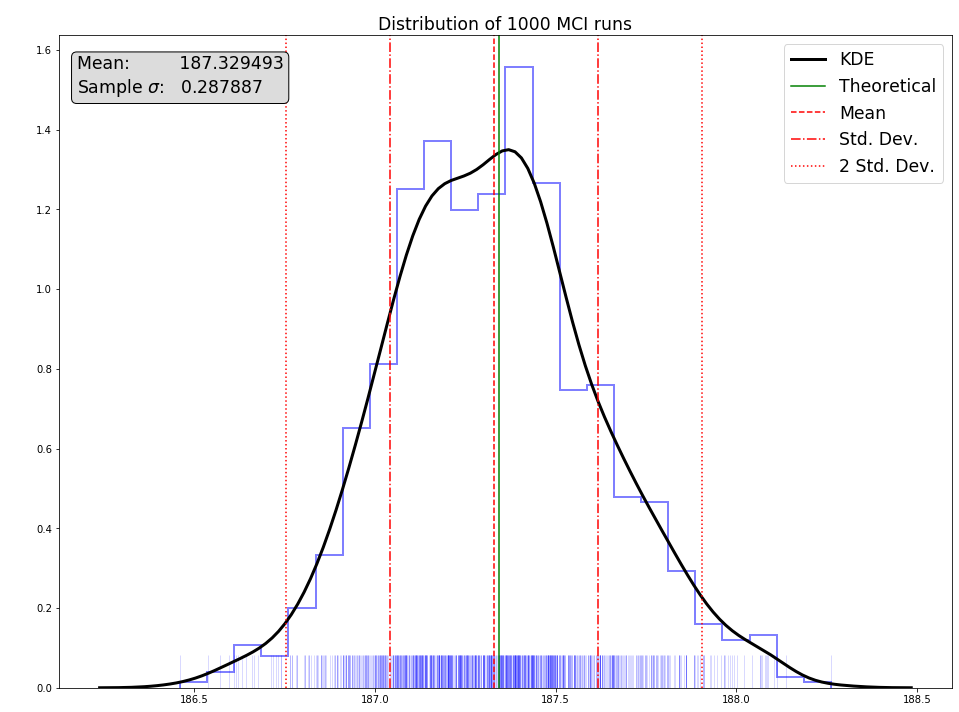

In [158]:
fig = plt.figure(figsize=(16, 12))
ax = sns.distplot(listx, rug=True, rug_kws={"color": "b", "alpha": .15},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": .5, "color": "b"})
ax.axvline(theoretical, c = 'g', label = 'Theoretical')
ax.axvline(np.mean(listx), c = 'r', ls = '--', label = 'Mean')
ax.axvline(np.mean(listx) - np.std(listx), c = 'r', ls = '-.')
ax.axvline(np.mean(listx) + np.std(listx), c = 'r', ls = '-.', label = 'Std. Dev.')
ax.axvline(np.mean(listx) - 2 * np.std(listx), c = 'r', ls = ':')
ax.axvline(np.mean(listx) + 2 * np.std(listx), c = 'r', ls = ':', label = '2 Std. Dev.')
ax.set_title('Distribution of %g MCI runs'%(k), fontsize = 'xx-large')
ax.annotate('Mean:         %.9g\nSample $\sigma$:   %.6g'%(np.mean(listx), np.std(listx)),
            xy = (.08, .87), xycoords = 'figure fraction', fontsize = 'xx-large',
            bbox=dict(boxstyle="round", fc="gainsboro"))
ax.legend(fontsize = 'xx-large')

# __Other Stuff__
#### *Long runs for $\pi$ and the three ellipse variations*

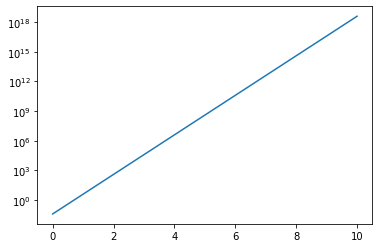

In [14]:
digits = np.linspace(0,10,200)
n = (5*10**(-digits))**(-2)
n.astype(int)
plt.semilogy(digits, n)

In [17]:
digits = 6
a = (25 / 2)**(.5)
b = (25 / 3)**(.5)
c = 5
n = int((5*10**(-digits))**(-2))
print(n)
tic = time.perf_counter()
pi_est = sim2(n)
toc = time.perf_counter()
print(f"Pi Completed in {toc - tic:0.4f} seconds")
'''
tic = time.perf_counter()
mass1 = sim2_ellipse(n)
toc = time.perf_counter()
print(f"Ellipse Completed in {toc - tic:0.4f} seconds")
tic = time.perf_counter()
mass2 = sim2_tellipse(n)
toc = time.perf_counter()
print(f"Truncation Completed in {toc - tic:0.4f} seconds")
tic = time.perf_counter()
mass3 = sim2_tvellipse(n)
toc = time.perf_counter()
print(f"Varient Density Completed in {toc - tic:0.4f} seconds")
print(f'Pi estimate : {pi_est}', 
     f'\nEllipsoid mass: {mass1}',
     f'\nTruncated ellipsoid mass: {mass2}'
     f'\nTruncated ellipsoid, varying density mass: {mass3}')
'''

40000000000
Pi Completed in 5145.5114 seconds


'\ntic = time.perf_counter()\nmass1 = sim2_ellipse(n)\ntoc = time.perf_counter()\nprint(f"Ellipse Completed in {toc - tic:0.4f} seconds")\ntic = time.perf_counter()\nmass2 = sim2_tellipse(n)\ntoc = time.perf_counter()\nprint(f"Truncation Completed in {toc - tic:0.4f} seconds")\ntic = time.perf_counter()\nmass3 = sim2_tvellipse(n)\ntoc = time.perf_counter()\nprint(f"Varient Density Completed in {toc - tic:0.4f} seconds")\nprint(f\'Pi estimate : {pi_est}\', \n     f\'\nEllipsoid mass: {mass1}\',\n     f\'\nTruncated ellipsoid mass: {mass2}\'\n     f\'\nTruncated ellipsoid, varying density mass: {mass3}\')\n'

In [18]:
print(f'Pi estimate : {pi_est},   {n} guesses.')

Pi estimate : 3.141599611,   40000000000 guesses.


In [19]:
digits = 6
a = (25 / 2)**(.5)
b = (25 / 3)**(.5)
c = 5
n = int((5*10**(-digits))**(-2))
'''
print(n)
tic = time.perf_counter()
pi_est = sim2(n)
toc = time.perf_counter()
print(f"Pi Completed in {toc - tic:0.4f} seconds")
'''
tic = time.perf_counter()
mass1 = sim2_ellipse(n)
toc = time.perf_counter()
print(f"Ellipse Completed in {toc - tic:0.4f} seconds",
     f'\nEllipsoid Mass: {mass1}')
'''
tic = time.perf_counter()
mass2 = sim2_tellipse(n)
toc = time.perf_counter()
print(f"Truncation Completed in {toc - tic:0.4f} seconds")
tic = time.perf_counter()
mass3 = sim2_tvellipse(n)
toc = time.perf_counter()
print(f"Varient Density Completed in {toc - tic:0.4f} seconds")
print(f'Pi estimate : {pi_est}', 
     f'\nEllipsoid mass: {mass1}',
     f'\nTruncated ellipsoid mass: {mass2}'
     f'\nTruncated ellipsoid, varying density mass: {mass3}')
'''

Ellipse Completed in 5386.5485 seconds 
Ellipsoid Mass: 213.7593151155921


'\ntic = time.perf_counter()\nmass2 = sim2_tellipse(n)\ntoc = time.perf_counter()\nprint(f"Truncation Completed in {toc - tic:0.4f} seconds")\ntic = time.perf_counter()\nmass3 = sim2_tvellipse(n)\ntoc = time.perf_counter()\nprint(f"Varient Density Completed in {toc - tic:0.4f} seconds")\nprint(f\'Pi estimate : {pi_est}\', \n     f\'\nEllipsoid mass: {mass1}\',\n     f\'\nTruncated ellipsoid mass: {mass2}\'\n     f\'\nTruncated ellipsoid, varying density mass: {mass3}\')\n'

In [21]:
digits = 6
a = (25 / 2)**(.5)
b = (25 / 3)**(.5)
c = 5
n = int((5*10**(-digits))**(-2))
'''
print(n)
tic = time.perf_counter()
pi_est = sim2(n)
toc = time.perf_counter()
print(f"Pi Completed in {toc - tic:0.4f} seconds")
tic = time.perf_counter()
mass1 = sim2_ellipse(n)
toc = time.perf_counter()
print(f"Ellipse Completed in {toc - tic:0.4f} seconds",
     f'\nEllipsoid Mass: {mass1}')
'''

tic = time.perf_counter()
mass2 = sim2_tellipse(n)
toc = time.perf_counter()
print(f"Truncation Completed in {toc - tic:0.4f} seconds",
     f'\nTruncated Ellipsoid Mass: {mass2}')

'''
tic = time.perf_counter()
mass3 = sim2_tvellipse(n)
toc = time.perf_counter()
print(f"Varient Density Completed in {toc - tic:0.4f} seconds")
print(f'Pi estimate : {pi_est}', 
     f'\nEllipsoid mass: {mass1}',
     f'\nTruncated ellipsoid mass: {mass2}'
     f'\nTruncated ellipsoid, varying density mass: {mass3}')
'''

Truncation Completed in 5616.1020 seconds 
Truncated Ellipsoid Mass: 82.84904035310528


'\ntic = time.perf_counter()\nmass3 = sim2_tvellipse(n)\ntoc = time.perf_counter()\nprint(f"Varient Density Completed in {toc - tic:0.4f} seconds")\nprint(f\'Pi estimate : {pi_est}\', \n     f\'\nEllipsoid mass: {mass1}\',\n     f\'\nTruncated ellipsoid mass: {mass2}\'\n     f\'\nTruncated ellipsoid, varying density mass: {mass3}\')\n'

In [22]:
digits = 6
a = (25 / 2)**(.5)
b = (25 / 3)**(.5)
c = 5
n = int((5*10**(-digits))**(-2))
'''
print(n)
tic = time.perf_counter()
pi_est = sim2(n)
toc = time.perf_counter()
print(f"Pi Completed in {toc - tic:0.4f} seconds")
tic = time.perf_counter()
mass1 = sim2_ellipse(n)
toc = time.perf_counter()
print(f"Ellipse Completed in {toc - tic:0.4f} seconds",
     f'\nEllipsoid Mass: {mass1}')

tic = time.perf_counter()
mass2 = sim2_tellipse(n)
toc = time.perf_counter()
print(f"Truncation Completed in {toc - tic:0.4f} seconds",
     f'\nTruncated Ellipsoid Mass: {mass2}')

'''
tic = time.perf_counter()
mass3 = sim2_tvellipse(n)
toc = time.perf_counter()
print(f"Varient Density Completed in {toc - tic:0.4f} seconds",
     f'\nTruncated ellipsoid mass: {mass3}')
'''
print(f'Pi estimate : {pi_est}', 
     f'\nEllipsoid mass: {mass1}',
     f'\nTruncated ellipsoid mass: {mass2}'
     f'\nTruncated ellipsoid, varying density mass: {mass3}')
'''

Varient Density Completed in 5437.6499 seconds 
Truncated ellipsoid mass: 187.34382912909197


"\nprint(f'Pi estimate : {pi_est}', \n     f'\nEllipsoid mass: {mass1}',\n     f'\nTruncated ellipsoid mass: {mass2}'\n     f'\nTruncated ellipsoid, varying density mass: {mass3}')\n"

### Percent Errors: 

In [28]:
print(f'Pi: {np.abs(pi_est-np.pi)/np.pi * 100}',
      f'\n Elli: {np.abs(mass1-213.758)/213.758 * 100}',
      f'\n T. Elli: {np.abs(mass2-82.8489)/82.8489 * 100}',
      f'\n T. Var. Elli: {np.abs(mass3-187.343)/187.343 * 100}')

Pi: 0.00022146124511446892 
 Elli: 0.0006152357301678989 
 T. Elli: 0.00016940853201449316 
 T. Var. Elli: 0.00044257276331800485
